In [1]:
import tensorflow as tf
physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [2]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                 include_top=False,
                 input_shape=(100, 100, 3))

In [3]:
from keras import models, layers, optimizers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='binary_crossentropy',
              metrics=['acc'])

In [4]:
conv_base.trainable=False

In [3]:
from keras.preprocessing.image import ImageDataGenerator
import os, shutil

os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'


base_dir = '/home/arnav/anaconda3/envs/deeplearning/Getting started with deep learning/dogs_vs_cats/dataset'

train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')
validation_dir = os.path.join(base_dir, 'validation')

train_datagen = ImageDataGenerator(
    rescale=1/255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
test_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(100, 100),
    batch_size=20,
    class_mode='binary')

validation_generator = train_datagen.flow_from_directory(
    validation_dir,
    target_size=(100, 100),
    batch_size=20,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [6]:
model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='binary_crossentropy',
              metrics=['acc'])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 3, 3, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               1179904   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 15,894,849
Trainable params: 1,180,161
Non-trainable params: 14,714,688
_________________________________________________________________


In [8]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=30,
                              validation_data=validation_generator,
                             validation_steps=50)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
100/100 [==============================] - 12s 115ms/step - loss: 0.6286 - acc: 0.6430 - val_loss: 0.5842 - val_acc: 0.7030
Epoch 2/30
100/100 [==============================] - 14s 136ms/step - loss: 0.5580 - acc: 0.7230 - val_loss: 0.5382 - val_acc: 0.7490
Epoch 3/30
100/100 [==============================] - 21s 213ms/step - loss: 0.5170 - acc: 0.7580 - val_loss: 0.5155 - val_acc: 0.7370
Epoch 4/30
100/100 [==============================] - 21s 215ms/step - loss: 0.4833 - acc: 0.7750 - val_loss: 0.4869 - val_acc: 0.7740
Epoch 5/30
100/100 [==============================] - 15s 149ms/step - loss: 0.4712 - acc: 0.7715 - val_loss: 0.4722 - val_acc: 0.7740
Epoch 6/30
100/100 [==============================] - 20s 205ms/step - loss: 0.4511 - acc: 0.7860 - val_loss: 0.4873 - val_acc: 0.7560
Epoch 7/30
100/100 [==============================] - 13s 132ms/step - loss: 0.4427 - acc: 0.7990 - val_loss: 0.46

In [9]:
model.save('cats_and_dogs_small_4.h5')

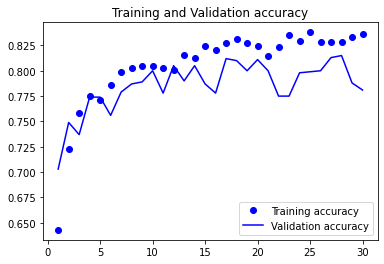

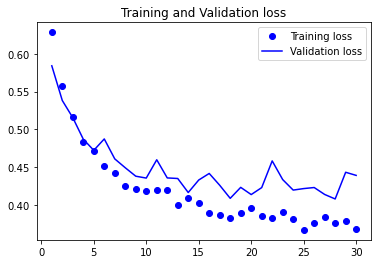

In [10]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label="Validation accuracy")
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label="Validation loss")
plt.title('Training and Validation loss')
plt.legend()

plt.show()

In [12]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100, 100, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)       0     

In [14]:
#fine tuning

conv_base.trainable=True

set_trainable=False
for layer in conv_base.layers :
    if layer.name=='block5_conv1' :
        set_trainable=True
    if set_trainable :
        layer.trainable=True
    else :
        layer.trainable=False

In [7]:
# from keras import models, optimizers
# model = models.load_model('cats_and_dogs_small_4.h5')

In [8]:
model.compile(optimizer=optimizers.RMSprop(lr=1e-5),
              loss='binary_crossentropy',
              metrics=['acc'])

In [9]:
history = model.fit(train_generator,
                    steps_per_epoch=100,
                    epochs=30,
                    validation_data=validation_generator,
                    validation_steps=50)

Epoch 1/30
100/100 [==============================] - 19s 189ms/step - loss: 0.3583 - acc: 0.8395 - val_loss: 0.4159 - val_acc: 0.8090
Epoch 2/30
100/100 [==============================] - 24s 236ms/step - loss: 0.3524 - acc: 0.8355 - val_loss: 0.4126 - val_acc: 0.8110
Epoch 3/30
100/100 [==============================] - 20s 201ms/step - loss: 0.3526 - acc: 0.8385 - val_loss: 0.4096 - val_acc: 0.8040
Epoch 4/30
100/100 [==============================] - 15s 146ms/step - loss: 0.3716 - acc: 0.8295 - val_loss: 0.4342 - val_acc: 0.7980
Epoch 5/30
100/100 [==============================] - 20s 200ms/step - loss: 0.3612 - acc: 0.8315 - val_loss: 0.3841 - val_acc: 0.8130
Epoch 6/30
100/100 [==============================] - 17s 173ms/step - loss: 0.3578 - acc: 0.8365 - val_loss: 0.4094 - val_acc: 0.8190
Epoch 7/30
100/100 [==============================] - 21s 211ms/step - loss: 0.3674 - acc: 0.8300 - val_loss: 0.3933 - val_acc: 0.8150
Epoch 8/30
100/100 [==============================] - 1

In [15]:
model.save('cats_and_dogs_small_5.h5')

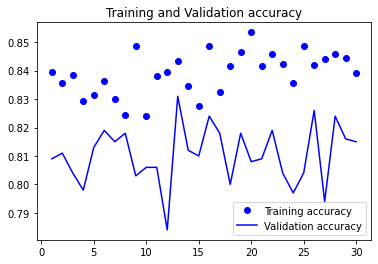

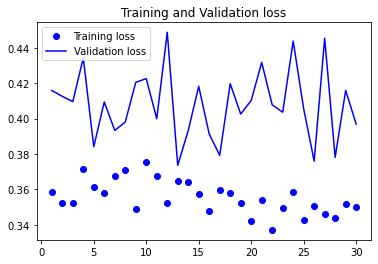

In [10]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label="Validation accuracy")
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label="Validation loss")
plt.title('Training and Validation loss')
plt.legend()

plt.show()

In [16]:
test_generator = test_datagen.flow_from_directory(test_dir,
                                                 target_size=(100, 100),
                                                 batch_size=20,
                                                 class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test_acc:', test_acc)

Found 1000 images belonging to 2 classes.
Instructions for updating:
Please use Model.evaluate, which supports generators.
test_acc: 0.8610000014305115
